## Fitness Level Prediction from Demographic, Lifestyle, and Health Metrics

## Overview

This project focuses on developing a machine learning model that classifies an individual’s fitness status as either Fit or Not Fit based on demographic, physiological, and lifestyle factors. The dataset contains 2,000 records with attributes such as age, height, weight, heart rate, blood pressure, sleep hours, nutrition quality, activity index, smoking habits, and gender.

The goal is to leverage these features to predict the is_fit label, enabling proactive health assessment and early intervention strategies. The project includes data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and performance evaluation using various classification algorithms.

By analyzing correlations between lifestyle habits, physiological measurements, and fitness outcomes, this model can help health professionals, fitness trainers, and wellness platforms in making data-driven recommendations to improve overall well-being.

## Datasets
The dataset was gotten from a source link (KAGGLE)
link is found here: https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic?resource

## Analytical Questions:

- How does age affect fitness levels?

- What is the relationship between height, weight, and fitness?

- Does blood pressure differ between fit and non-fit individuals?

- How does activity index influence fitness status?

- Which demographic group (age + gender) is most likely to be fit or unfit?

- Does better nutrition quality translate to higher fitness?


## Hypothesis

- Individuals who sleep 7+ hours per night do not have a higher proportion of being fit compared to those who sleep less than 7 hours.

## DATA UNDERSTANDING

In [709]:
# impoort packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import ttest_ind
from sklearn.feature_selection import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier
)
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV




In [710]:
# Loading our dataset
Fitness_df =pd.read_csv('../Dataset/fitness_dataset.csv')

In [711]:
Fitness_df .head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


## EXPLORATORY DATA ANALYSIS

In [712]:
Fitness_df.shape

(2000, 11)

In [713]:
Fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [714]:
Fitness_df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [715]:
for column in Fitness_df:
        print(f"Column Name : {column}")
        print(Fitness_df[column].unique())
        print("-----------------------------")

Column Name : age
[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]
-----------------------------
Column Name : height_cm
[152 186 192 189 175 172 193 188 164 198 153 178 171 174 162 167 182 165
 194 191 151 184 183 179 181 195 196 159 169 154 150 163 199 197 158 173
 161 155 160 156 157 190 166 187 177 176 168 185 180 170]
-----------------------------
Column Name : weight_kg
[ 65  95 103  83  99  85  57 108  55  63  90  89  45  84 116 105  56  77
 113  52  69  74  91  30  62 110 112  80  35  72  59  46 107  73 118 119
  54  58 117  47 114  71  82  60  79 109 106  93  67  68  98  97 104  76
 111  88  92 101  78 100  81  51  64  87  75  48  94  70  50  86  61  66
  49  96 200 250 115  53 102 220]
-----------------------------
Column Name : heart_rate
[ 69.6  60.8  61.4  60.2  58.1  81.2  79.6  70.1  67.1  67.3  82.3  48.2
  63.8  59.4  86.3  64.3  

In [716]:
Fitness_df.isna().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [717]:
Fitness_df[Fitness_df['sleep_hours'].isnull()]

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
14,41,162,45,59.4,112.5,NaN,2.47,4.62,no,M,1
22,19,184,77,61.6,121.7,NaN,2.55,2.09,1,M,0
34,78,178,112,54.3,133.8,NaN,4.56,4.51,1,M,0
...,...,...,...,...,...,...,...,...,...,...,...
1944,33,193,46,102.2,98.4,NaN,4.19,4.85,no,M,1
1949,42,190,51,64.9,102.5,NaN,4.22,3.10,yes,F,0
1983,47,157,99,84.1,129.5,NaN,8.89,1.84,yes,M,0
1984,69,192,73,58.2,105.7,NaN,5.60,3.48,0,M,1


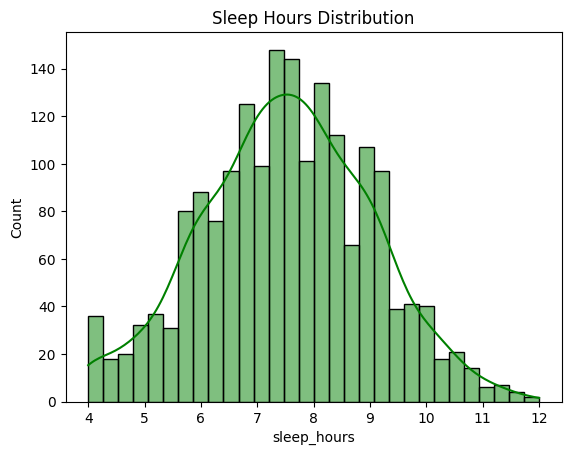

In [718]:
sns.histplot(Fitness_df['sleep_hours'], kde=True, bins=30, color= 'green' )
plt.title("Sleep Hours Distribution")
plt.show()

This shows sleep hours is normall distributed therefore we opt for using median as our imputer

In [719]:
Fitness_df.groupby('is_fit')['sleep_hours'].median()

is_fit
0    7.4
1    7.8
Name: sleep_hours, dtype: float64

In [720]:

# Fill missing sleep_hours with the mean of each isfit group
Fitness_df['sleep_hours'] = Fitness_df.groupby('is_fit')['sleep_hours'].transform(
    lambda x: x.fillna(x.median())
)

In [721]:
Fitness_df.isna().sum()

age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64

In [722]:
Fitness_df.duplicated().sum()

np.int64(0)

In [723]:
Fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [724]:
# Map string values "0" and "1" to "No" and "Yes"
Fitness_df['smokes'] = Fitness_df['smokes'].replace({'0': 'no', '1': 'yes'})

In [725]:
# Description statistics
Fitness_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2000.0,NaN,NaN,NaN,49.114,17.926564,18.0,34.0,49.0,65.0,79.0
height_cm,2000.0,NaN,NaN,NaN,174.533,14.37175,150.0,162.0,174.0,187.0,199.0
weight_kg,2000.0,NaN,NaN,NaN,83.5405,25.852534,30.0,64.0,83.0,102.0,250.0
heart_rate,2000.0,NaN,NaN,NaN,70.2886,11.846339,45.0,62.1,70.25,78.425,118.6
blood_pressure,2000.0,NaN,NaN,NaN,119.90885,14.578032,90.0,109.7,120.0,129.8,171.2
sleep_hours,2000.0,NaN,NaN,NaN,7.51745,1.441811,4.0,6.6,7.5,8.4,12.0
nutrition_quality,2000.0,NaN,NaN,NaN,5.03514,2.864156,0.0,2.5475,5.065,7.47,10.0
activity_index,2000.0,NaN,NaN,NaN,2.99904,1.136383,1.0,2.0375,2.98,3.95,4.99
smokes,2000,2,no,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2000,2,F,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# KEY INSIGHTS AND OBSERVATIONS

- Fitness enthusiasts have an average age of 49 years, with ages spanning from 18 to 79 years.

- Their average height is 175 cm, falling within a range of 150 cm to 199 cm.

- The typical weight is 83.5 kg, with values ranging between 30 kg and 250 kg.

- The mean resting heart rate is 70.3 bpm, varying from 45 bpm to 118.6 bpm.

- Average blood pressure is recorded at 119.9 mmHg, with readings from 90 mmHg to 171.2 mmHg.

- On average, they sleep 7.5 hours per night, with sleep duration ranging from 4 to 12 hours.

- Smoking is less prevalent among fitness participants than non-smokers.



## UNIVARIATE ANALYSIS

In [726]:
# Retrieve columns with numerical data types, excluding 'is_fit'
num_cols = Fitness_df.select_dtypes(include='number').drop(columns=['is_fit'])

In [727]:
#retrieving columns with object data types
cat_cols=Fitness_df.select_dtypes(include='object')
cat_cols.columns

Index(['smokes', 'gender'], dtype='object')

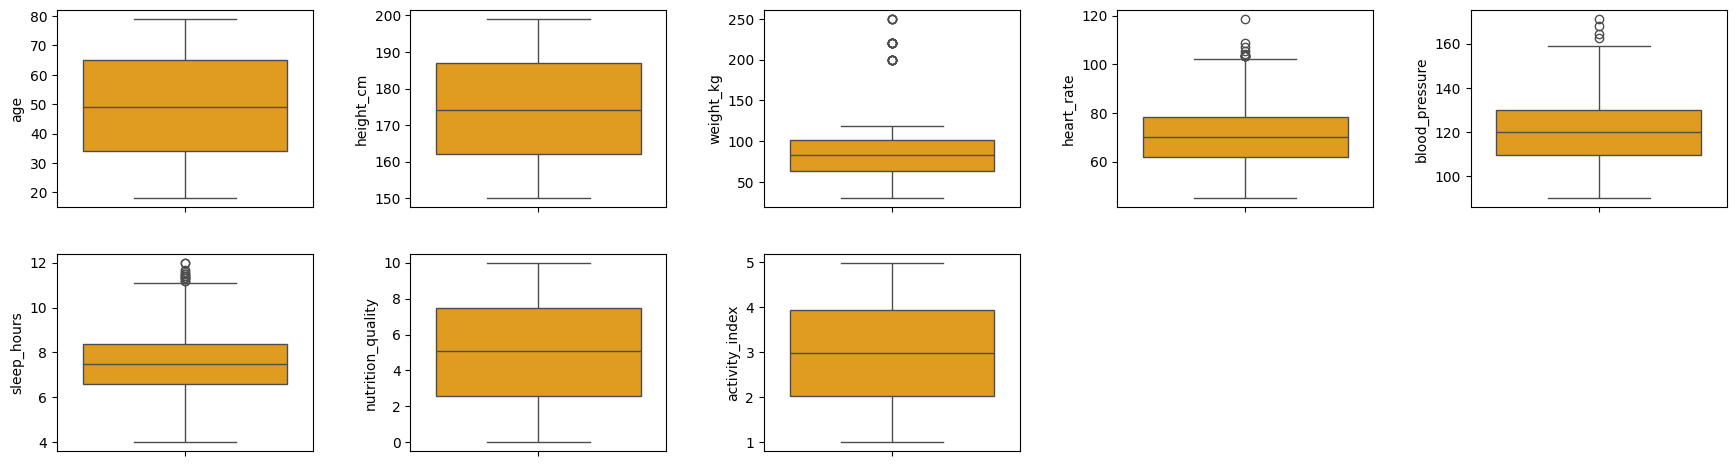

In [728]:
# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.boxplot(Fitness_df, y=Fitness_df[variable], color='orange')
    plt.tight_layout(pad=3),
    plt.xticks(rotation=45)
plt.show()

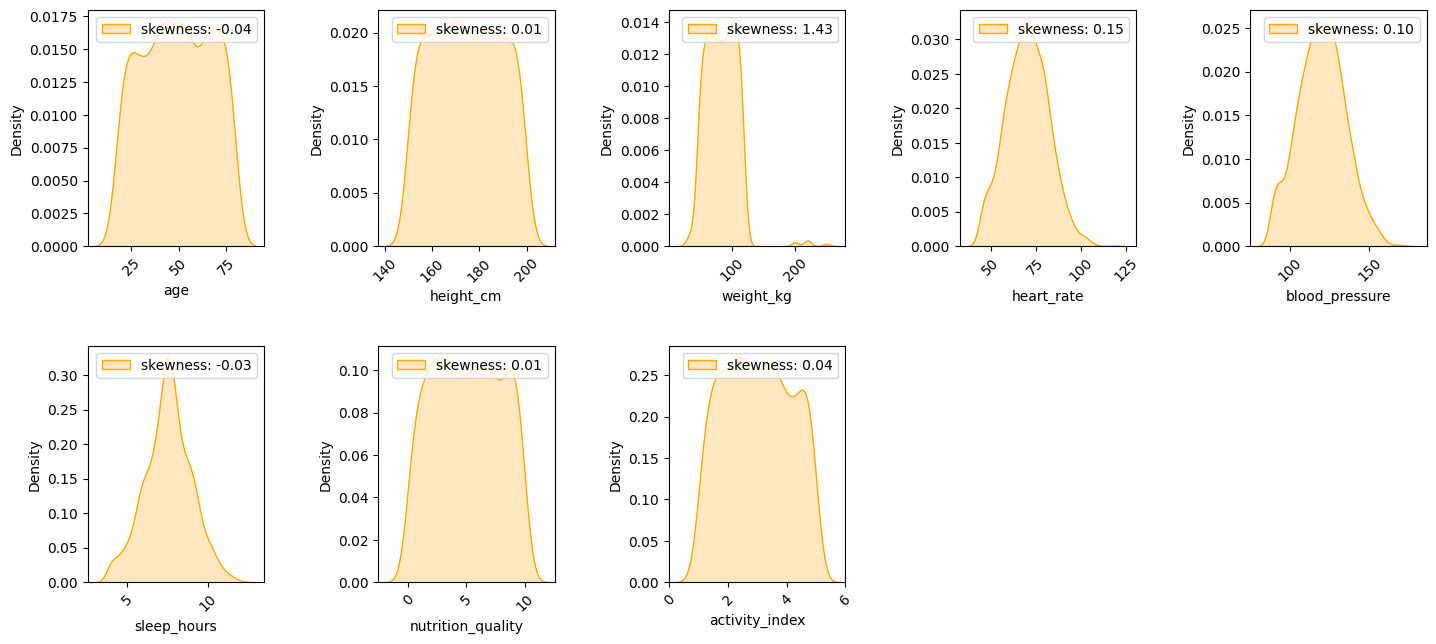

In [729]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.kdeplot(Fitness_df,x=Fitness_df[variable],label= 'skewness: %.2f'%(Fitness_df[variable].skew()), fill = True,color='orange')
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

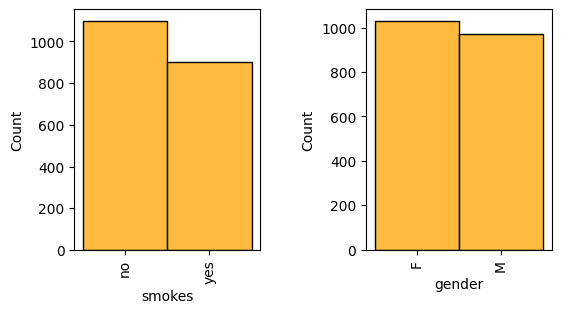

In [730]:
# Plot a Bar chart plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cat_cols):
    plt.subplot(6,5, i + 1)
    sns.histplot(cat_cols,x=cat_cols[variable], color='orange')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

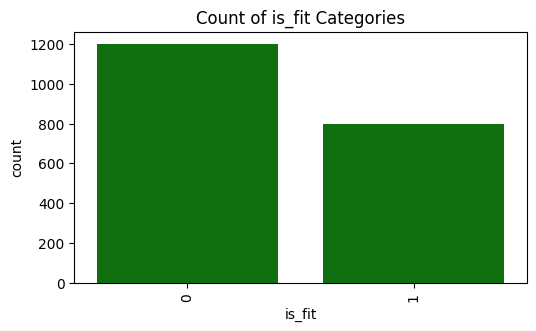

In [731]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Fitness_df, x='is_fit', color='green')
plt.title('Count of is_fit Categories')
plt.tight_layout(pad=3)
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS

- Outliers were identified in weight (kg), blood pressure, and heart rate.

- Density, nutrition quality, and activity index followed a normal distribution, while weight (kg), heart rate, and blood pressure showed left skewness.

- The dataset contains a higher proportion of non-smokers compared to smokers.

- Females are more represented in the dataset than males.

##  BIVARIATE & MULTIVARIATE ANALYSIS 

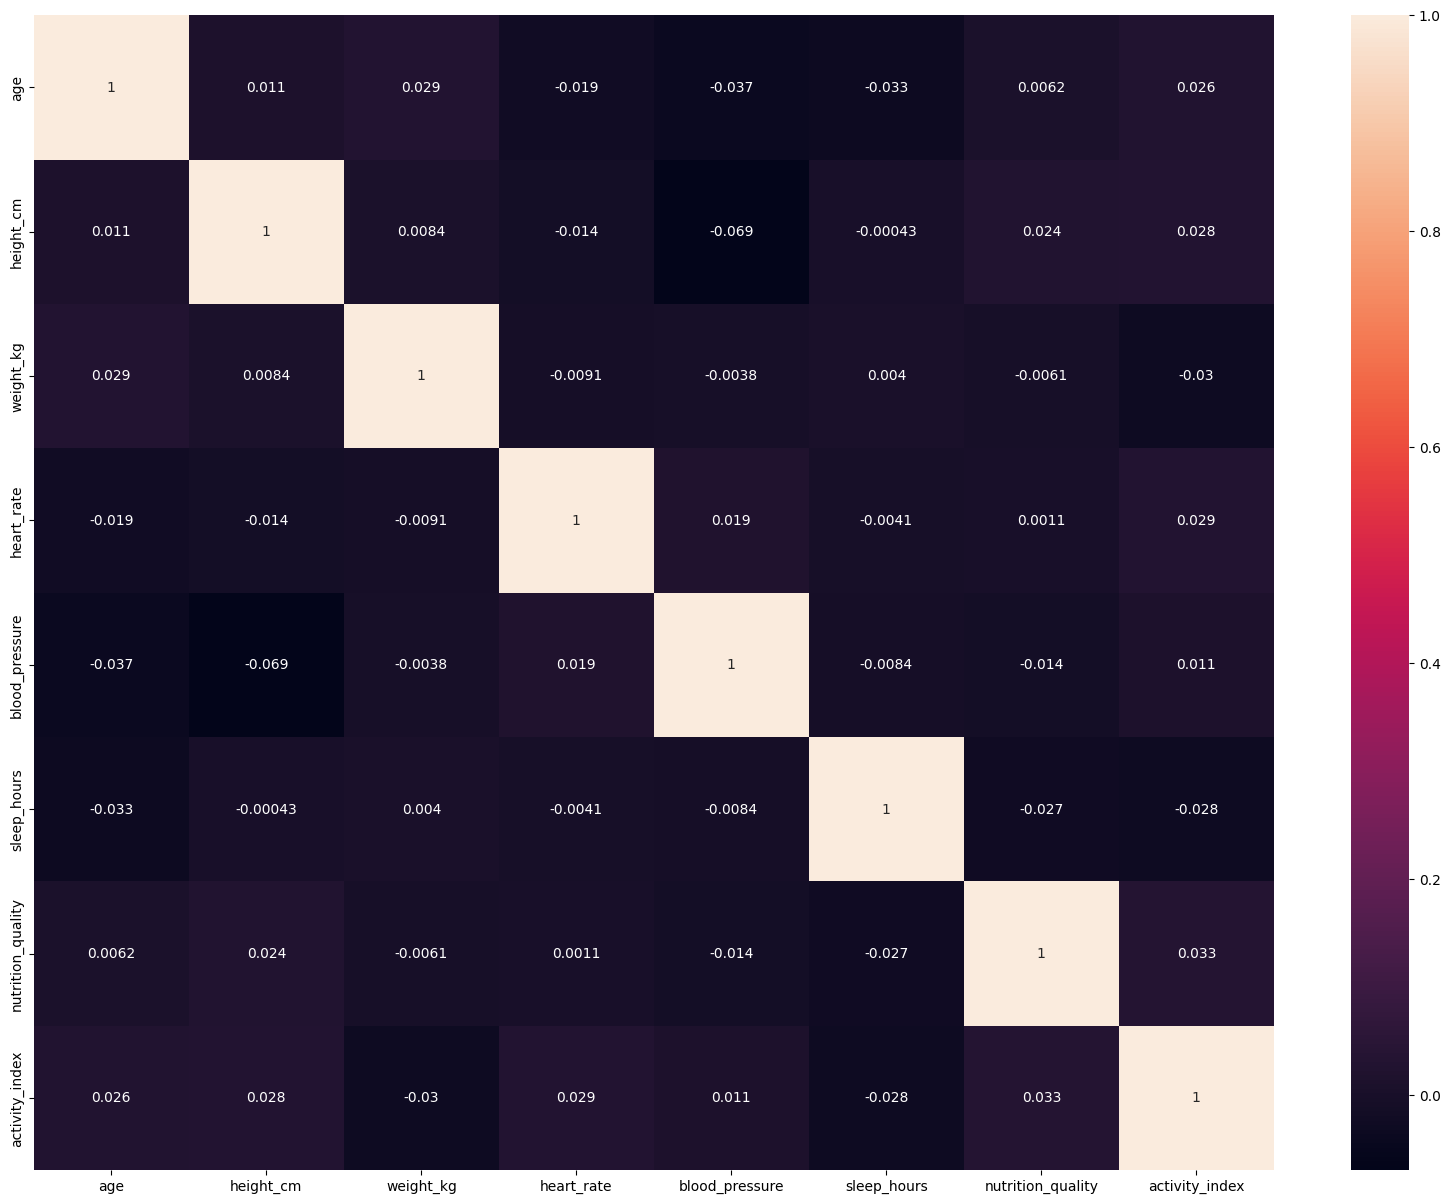

In [732]:
# plotting heatmap for correlatiuon between each variable
plt.figure(figsize=(20, 15))
sns.heatmap(data=num_cols.corr(), annot=True, color=['orange','brown'])
plt.show()

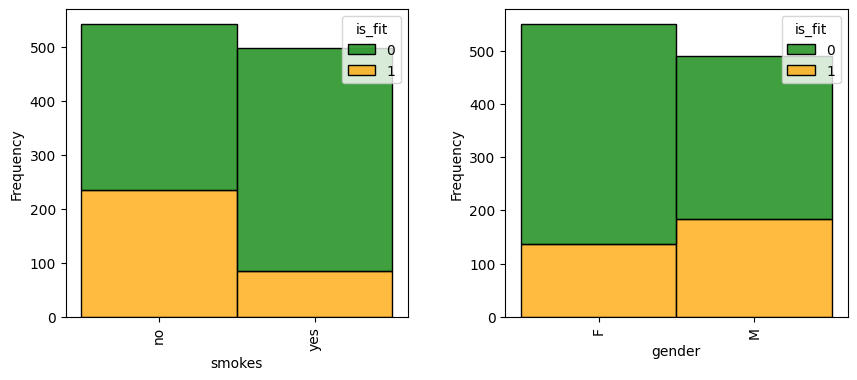

In [733]:
plt.figure(figsize=(18, 20))
# plotting histogram plot
for i, variable in enumerate(cat_cols):
    plt.subplot(5,4, i + 1)
    sns.histplot(Fitness_df,x=Fitness_df[variable], stat='frequency', hue='is_fit', multiple='stack', palette=['green','orange'])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

plt.show()

# OBSERVATIONS

- Age shows a positive, though weak, correlation with weight (kg) and height.

- Height is positively correlated with weight, nutrition quality, and activity index.

- Weight has a low positive correlation with sleep hours.

- Heart rate shows a stronger positive correlation with activity index.

- Nutrition quality has a very weak positive correlation with age.

- Individuals who do not smoke exhibit a higher rate of fitness compared to those who smoke.

- Females have a higher proportion of non-fit individuals compared to males, indicating that males are generally fitter than females in the dataset.

# ANALYTICAL QUESTIONS

- How does age affect fitness levels?


In [734]:
bins = list(range(18, 80, 10))  # [18, 28, 38, 48, 58, 68, 78]
bins[-1] = 79  # make sure the last bin ends at 79

In [735]:
# Define labels
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]


In [736]:
# Create new column
Fitness_df['age_group'] = pd.cut(Fitness_df['age'], bins=bins, labels=labels, right=True)

In [737]:
age_fit

is_fit,0,1
age_group,,
18-28,147,160
28-38,141,143
38-48,190,152
48-58,221,122
58-68,211,103
68-79,280,94


/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_67364/2820267721.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fit = Fitness_df.groupby(['age_group', 'is_fit']).size().unstack(fill_value=0)


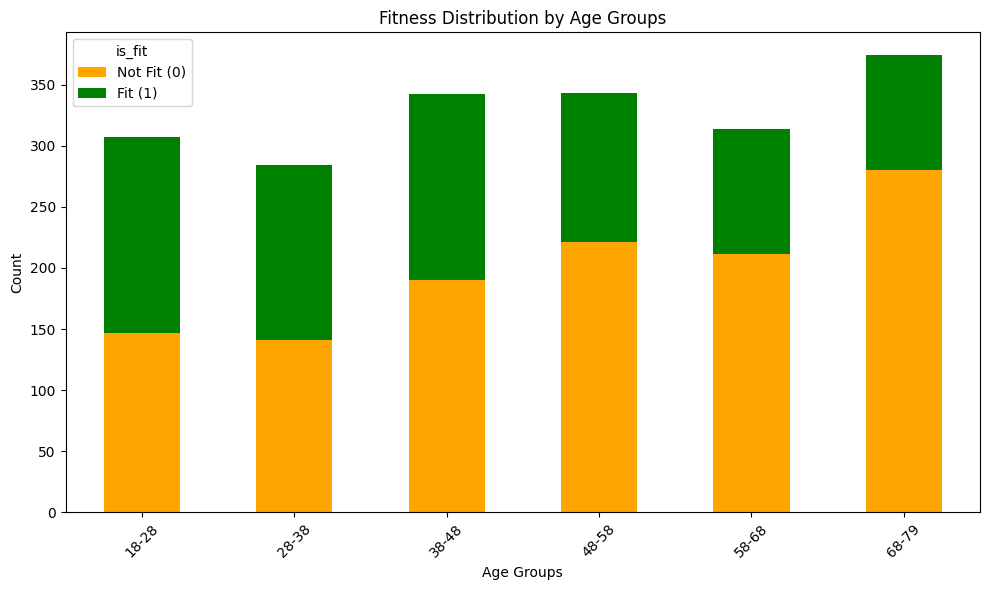

In [738]:

# Group by age group and is_fit
age_fit = Fitness_df.groupby(['age_group', 'is_fit']).size().unstack(fill_value=0)

# Plot stacked bar chart
age_fit.plot(kind='bar', stacked=True, figsize=(10,6), color=['orange','green'])

plt.title("Fitness Distribution by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.legend(title="is_fit", labels=["Not Fit (0)", "Fit (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the analysis, the age group 68–79 recorded the highest number of unfit individuals (280) while also showing the lowest count of fit individuals (94). In contrast, the 18–28 group had the highest number of fit individuals (160), closely followed by the 38–48 group with 152. This suggests that fitness levels tend to be higher among younger and middle-aged individuals, while unfitness is more prevalent in older age groups.


- What is the relationship between height, weight, and fitness?


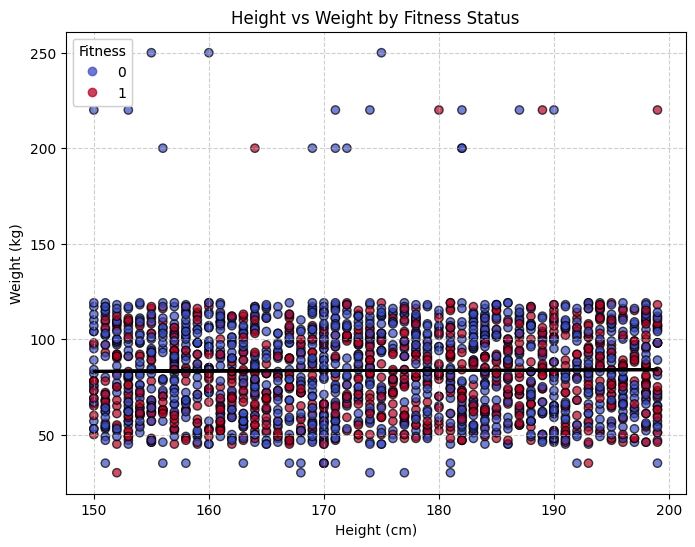

In [739]:
x = Fitness_df['height_cm']
y = Fitness_df['weight_kg']

# Fit a linear regression line
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    x, y,
    c=Fitness_df['is_fit'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='k'
)

# Add regression line
plt.plot(x, m*x + b, color='black', linewidth=2, label='Trend Line')

plt.title("Height vs Weight by Fitness Status")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Add legend for fitness categories
legend1 = plt.legend(*scatter.legend_elements(), title="Fitness", loc="upper left")
plt.gca().add_artist(legend1)

plt.show()


The distribution of weight across height shows a wide variation, with weights ranging from around 30 kg up to 250 kg and heights spanning ~150 cm to 200 cm. Most individuals fall within the 50–120 kg range regardless of fitness status. Outliers are present at both extremes, with very low weights (<40 kg) and very high weights (>200 kg), though the more extreme high weights tend to be associated with unfit individuals (blue). Both fit (red) and unfit (blue) individuals are spread across the chart, with no clear visual separation based solely on height and weight. However, fit individuals appear to cluster more closely within healthy weight ranges (60–100 kg), whereas unfit individuals are more dispersed, including the extreme values. The trend line indicates a slight positive relationship (taller people generally weigh more). Although the relationship is weak, as weights vary considerably at each height.


- Does blood pressure differ between fit and non-fit individuals?

/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_67364/655467294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


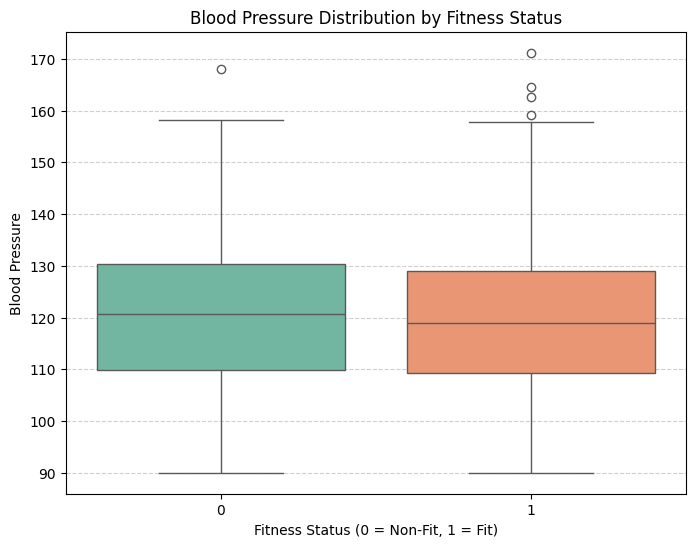

In [740]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=Fitness_df,
    x="is_fit",
    y="blood_pressure",
    palette="Set2"
)

plt.title("Blood Pressure Distribution by Fitness Status")
plt.xlabel("Fitness Status (0 = Non-Fit, 1 = Fit)")
plt.ylabel("Blood Pressure")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

The analysis reveals outliers in blood pressure distribution for both fit and unfit individuals, indicating unusual blood pressure readings. However, the average blood pressure between the two groups shows minimal difference, with unfit individuals having only a slightly higher average. Additionally, the maximum blood pressure recorded among unfit individuals is somewhat higher compared to fit individuals.

- How does activity index influence fitness status?

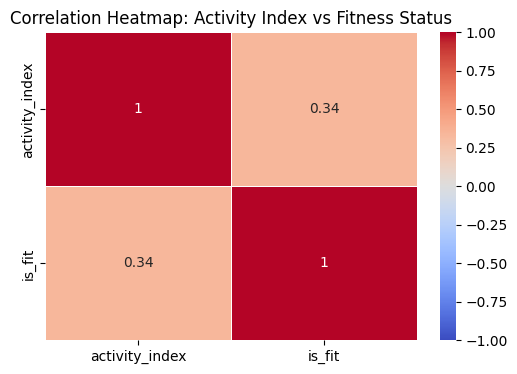

In [741]:
# Compute correlation (using Pearson by default)
Fitness_corr = Fitness_df[['activity_index', 'is_fit']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(Fitness_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap: Activity Index vs Fitness Status")
plt.show()


### Observation

The activity index shows a moderate positive correlation with fitness status (0.34), indicating that individuals with higher levels of physical activity are more likely to be fit. This suggests that maintaining an active lifestyle plays a meaningful role in improving fitness outcomes.


- Which demographic group (age + gender) is most likely to be fit or unfit?


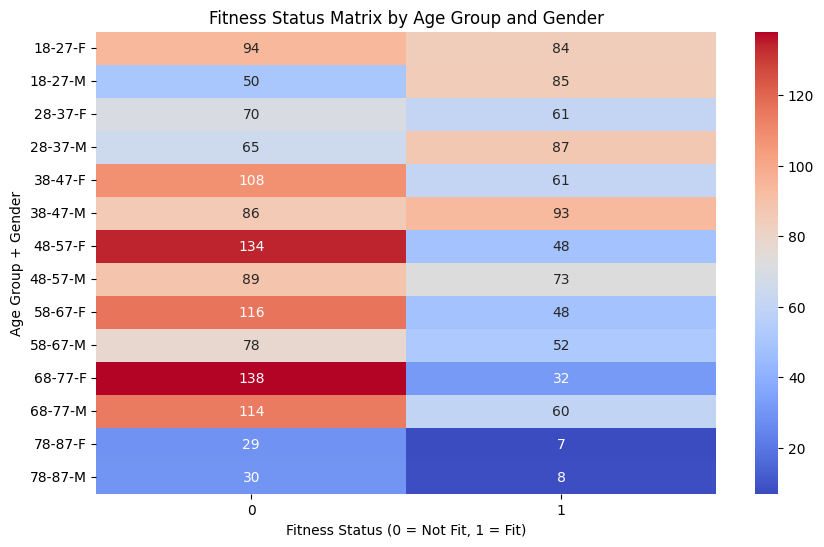

In [742]:
bins = range(18, 90, 10)  # groups of 10 years
labels = [f"{i}-{i+9}" for i in bins[:-1]]
Fitness_df['age_group'] = pd.cut(Fitness_df['age'], bins=bins, labels=labels, right=False)

# Create pivot table: counts of is_fit by age_group and gender
matrix = pd.crosstab(index=[Fitness_df['age_group'], Fitness_df['gender']],
                     columns=Fitness_df['is_fit'])

# Plot as heatmap
plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Fitness Status Matrix by Age Group and Gender")
plt.ylabel("Age Group + Gender")
plt.xlabel("Fitness Status (0 = Not Fit, 1 = Fit)")
plt.show()


### Observation

Among unfit individuals, females aged 68–77 and 48–57 record the highest counts (134 each), while the lowest falls within the 28–37 group (70). For males, the unfit peak occurs in the 68–77 age group (114), with the lowest in the 18–27 group (50). On the fit side, females are most represented in the 18–27 group (84) and least in the 68–77 group (32), while fit males peak in the 38–47 group (93) and drop to their lowest in the 58–67 group (52).


- Does better nutrition quality translate to higher fitness?

In [743]:
# Group by nutrition quality and calculate fitness rate
fitness_rate = Fitness_df.groupby('is_fit')['nutrition_quality'].mean().reset_index()

In [744]:
fitness_rate

,is_fit,nutrition_quality
0,0,4.438585
1,1,5.931840


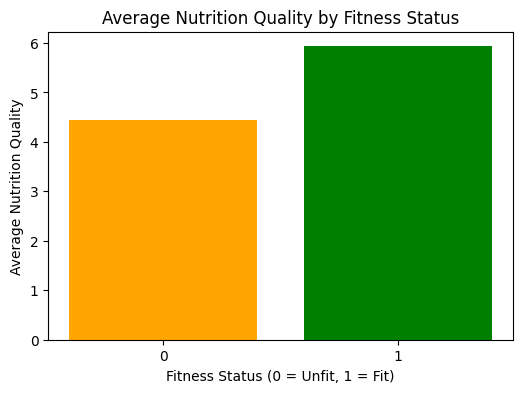

In [745]:
# Bar chart
plt.figure(figsize=(6,4))
plt.bar(fitness_rate['is_fit'].astype(str), fitness_rate['nutrition_quality'], color=['orange','green'])
plt.title("Average Nutrition Quality by Fitness Status")
plt.xlabel("Fitness Status (0 = Unfit, 1 = Fit)")
plt.ylabel("Average Nutrition Quality")
plt.show()

### Observation

Unfit individuals exhibit a lower average nutrition quality score (4.44) than fit individuals (5.93). This indicates that higher nutrition quality is linked to an increased likelihood of being fit.

## HYPOTHESIS

Null Hypothesis (H₀):
Individuals who sleep 7+ hours per night do not have a higher proportion of being fit compared to those who sleep less than 7 hours.

Alternative Hypothesis (H₁):
Individuals who sleep 7+ hours per night have a significantly higher proportion of being fit compared to those who sleep less than 7 hours.

In [746]:
group_A = Fitness_df[Fitness_df['sleep_hours'] >= 7]['is_fit']
group_B = Fitness_df[Fitness_df['sleep_hours'] < 7]['is_fit']


In [747]:
Fitness_df['sleep_group'] = Fitness_df['sleep_hours'].apply(lambda x: '7+ hours' if x >= 7 else '<7 hours')

# Build the contingency table
contingency_table = pd.crosstab(Fitness_df['sleep_group'], Fitness_df['is_fit'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
is_fit         0    1
sleep_group          
7+ hours     787  573
<7 hours     414  226


In [748]:
# Run Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\n✅ Reject Null Hypothesis: SIndividuals who sleep 7+ hours per night do not have a higher proportion of being fit compared to those who sleep less than 7 hours..")
else:
    print("\n❌ Fail to Reject Null Hypothesis: Individuals who sleep 7+ hours per night have a significantly higher proportion of being fit compared to those who sleep less than 7 hours.")



Chi-square Statistic: 8.155524430762524
Degrees of Freedom: 1
P-value: 0.004293018390385868

Expected Frequencies:
[[816.68 543.32]
 [384.32 255.68]]

✅ Reject Null Hypothesis: SIndividuals who sleep 7+ hours per night do not have a higher proportion of being fit compared to those who sleep less than 7 hours..


## DATA PREPARATION

In [749]:
Fitness_df['is_fit'].unique()

array([1, 0])

In [750]:
# Map string values "0" and "1" to "No" and "Yes"
Fitness_df['is_fit'] = Fitness_df['is_fit'].replace({0: 'no', 1: 'yes'})

In [751]:
Fitness_df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit,age_group,sleep_group
0,56,152,65,69.6,117.0,7.8,2.37,3.97,no,F,yes,48-57,7+ hours
1,69,186,95,60.8,114.8,7.5,8.77,3.19,no,F,yes,68-77,7+ hours
2,46,192,103,61.4,116.4,7.4,8.20,2.03,no,F,no,38-47,7+ hours
3,32,189,83,60.2,130.1,7.0,6.18,3.68,no,M,yes,28-37,7+ hours
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,yes,58-67,7+ hours


In [752]:
for column in Fitness_df:
        print(f"Column Name : {column}")
        print(Fitness_df[column].unique())
        print("-----------------------------")

Column Name : age
[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]
-----------------------------
Column Name : height_cm
[152 186 192 189 175 172 193 188 164 198 153 178 171 174 162 167 182 165
 194 191 151 184 183 179 181 195 196 159 169 154 150 163 199 197 158 173
 161 155 160 156 157 190 166 187 177 176 168 185 180 170]
-----------------------------
Column Name : weight_kg
[ 65  95 103  83  99  85  57 108  55  63  90  89  45  84 116 105  56  77
 113  52  69  74  91  30  62 110 112  80  35  72  59  46 107  73 118 119
  54  58 117  47 114  71  82  60  79 109 106  93  67  68  98  97 104  76
 111  88  92 101  78 100  81  51  64  87  75  48  94  70  50  86  61  66
  49  96 200 250 115  53 102 220]
-----------------------------
Column Name : heart_rate
[ 69.6  60.8  61.4  60.2  58.1  81.2  79.6  70.1  67.1  67.3  82.3  48.2
  63.8  59.4  86.3  64.3  

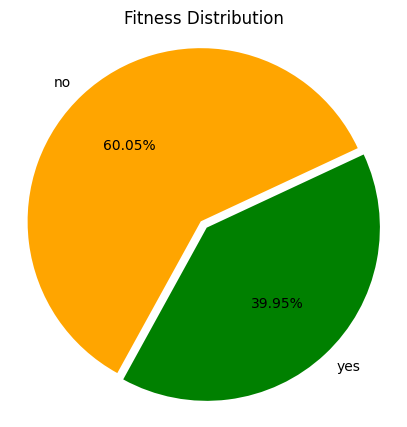

In [753]:
fitness_counts = Fitness_df['is_fit'].value_counts()
explode = [0.05 if label == 'yes' else 0 for label in fitness_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(fitness_counts, labels=fitness_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['orange', 'green'])
plt.axis('equal')
plt.title('Fitness Distribution')
plt.show()

- The dataset shows class imbalance, with 60.05% versus 39.95% distribution.

- To address this, we will apply SMOTE for balancing the classes.

- Both the imbalanced and balanced datasets will be modeled, and the results compared.

Splitting data into x and y, (training and evaluation)

In [754]:
X = Fitness_df.drop(columns=['is_fit']) 

y = Fitness_df['is_fit']  

In [755]:

# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=5, stratify = y)

In [756]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (1500, 12)
X_eval shape: (500, 12)
y_train shape: (1500,)
y_eval shape: (500,)


### PIPELINE

In [757]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)

In [758]:
#selecting numeric and categorical columns
numeric_cols = X_train.select_dtypes(include='number').columns.drop(['sleep_hours', 'activity_index'])
cat_cols = X_train.select_dtypes(include='object').columns
Zero_cols = ['sleep_hours', 'activity_index']

In [759]:
# Pipelines for each group
num_median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])


In [760]:

num_zero_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', RobustScaler())
])


In [761]:

cat_pipeline=Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])



In [762]:
preprocessor= ColumnTransformer(transformers=[
    ('num_median_pipeline',num_median_pipeline, numeric_cols),
    ('num_zero_pipeline',num_zero_pipeline, Zero_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])

Train and evaluate on balanced labels


In [763]:
models={}
models['Logistic_Regression']= LogisticRegression(random_state=5)
models['Support_Vector_Machine']= LinearSVC(random_state=5)
models['Decision_Tree']= DecisionTreeClassifier(random_state=5)
models['Random_Forest']= RandomForestClassifier(random_state=5)
models['Naive_Bayes']= GaussianNB()
models['K-Nearest_Neighbors']= KNeighborsClassifier()
models['Category_Boosting']= CatBoostClassifier(random_state=5, verbose=0)
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=5)
models['XGBoost']= XGBClassifier(random_state=5)

In [764]:
# Define feature selection step
feature_selection = SelectKBest(score_func= mutual_info_classif, k='all')

### Train and evaluate on unbalanced labels

In [765]:
# Creating Pipeline

all_pipelines_balanced = {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_balanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
6,Category_Boosting,0.788,0.794798,0.788,0.789583
7,Gradient_Boosting,0.788,0.793312,0.788,0.789392
0,Logistic_Regression,0.786,0.796682,0.786,0.787927
1,Support_Vector_Machine,0.786,0.795761,0.786,0.787867
3,Random_Forest,0.780,0.780803,0.780,0.780351
8,XGBoost,0.768,0.772809,0.768,0.769408
4,Naive_Bayes,0.756,0.762357,0.756,0.757717
5,K-Nearest_Neighbors,0.666,0.684428,0.666,0.669366
2,Decision_Tree,0.658,0.673487,0.658,0.661356


### Train and evaluate on unbalanced labels

In [766]:
all_pipelines = {}

# creating a dataframe 
metric_table=pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

# function to retrieve items in models
for model_name, classifier in models.items(): 
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selection),   
        ('classifier', classifier)  
    ])
     # Fitting the models   
    final_pipeline.fit(X_train, y_train_encode)
    all_pipelines[model_name] = final_pipeline
    
    # Predicting the model
    y_predr=final_pipeline.predict(X_eval)
    
    #  Classification report
    metrics= classification_report(y_eval_encode, y_predr, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)]=[model_name, accuracy, precision, recall, f1_score]
# Sort values in ascending order
metric_table.sort_values(by='f1-score', ascending=False)


,model_name,accuracy,precision,recall,f1-score
6,Category_Boosting,0.790,0.790566,0.790,0.790254
7,Gradient_Boosting,0.780,0.778608,0.780,0.778983
0,Logistic_Regression,0.780,0.778303,0.780,0.778519
1,Support_Vector_Machine,0.776,0.774241,0.776,0.774492
4,Naive_Bayes,0.774,0.773473,0.774,0.773708
3,Random_Forest,0.770,0.768225,0.770,0.768576
8,XGBoost,0.762,0.763092,0.762,0.762469
5,K-Nearest_Neighbors,0.704,0.701473,0.704,0.702325
2,Decision_Tree,0.692,0.694231,0.692,0.692939


### Hyperparameter Tuning

Hyperparameter tuning models with Balanced labels

In [767]:

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])


pparam_grids = {
    'Logistic_Regression': {'logistic_regression__C': [10, 100, 200, 300]},
    'Support_Vector_Machine': {'support_vector_machine__C': [1]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 5, 10]},
    'Random_Forest': {'random_forest__n_estimators': [200, 300, 400], 'random_forest__max_depth': [10, 20, 30]},
    'Category_Boosting': {'category_boosting__learning_rate': [0.1, 1, 10], 'category_boosting__depth': [5], 'category_boosting__iterations': [100, 200, 300]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [100], 'gradient_boosting__max_depth': [2, 3], 'gradient_boosting__learning_rate': [0.1, 1, 10]},
    'XGBoost': {'xgboost__n_estimators': [30, 40, 50], 'xgboost__max_depth': [2, 3]}

}



# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Category_Boosting', 'Gradient_Boosting', 'XGBoost']:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(pipeline, pparam_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Tuning Logistic_Regression...
Best parameters: {'logistic_regression__C': 10}
Best score: 0.776
Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 1}
Best score: 0.776
Tuning Decision_Tree...
Best parameters: {'decision_tree__max_depth': 5}
Best score: 0.7213333333333334
Tuning Random_Forest...
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.772
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.772
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 300}
Best score: 0.772
Tuning Category_Boosting...


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease l

Best parameters: {'category_boosting__depth': 5, 'category_boosting__iterations': 100, 'category_boosting__learning_rate': 0.1}
Best score: 0.7819999999999999
Tuning Gradient_Boosting...
Best parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 100}
Best score: 0.7746666666666666
Tuning XGBoost...
Best parameters: {'xgboost__max_depth': 3, 'xgboost__n_estimators': 40}
Best score: 0.7806666666666667



### Tuned Models for balanced labels

In [768]:
tuned_models_b={}
tuned_models_b['Logistic_Regression_tunedb']= LogisticRegression(
                            C=10,  
                            random_state=5)
tuned_models_b['Support_Vector_Machine_tunedb']= LinearSVC(
                            C= 1, 
                            random_state=5)
tuned_models_b['Decision_Tree_tunedb']= DecisionTreeClassifier(
                            max_depth= 5,  
                            random_state=5)
tuned_models_b['Random_Forest_tunedb']= RandomForestClassifier( 
                            max_depth= 20,  
                            n_estimators= 300, 
                            random_state=5)
tuned_models_b['Naive_Bayes']= GaussianNB()
tuned_models_b['K-Nearest_Neighbors']= KNeighborsClassifier()
tuned_models_b['Category_Boosting_tunedb']= CatBoostClassifier(
                            depth= 5,
                            iterations= 100, 
                            learning_rate= 0.1, 
                            random_state=5, 
                            )
tuned_models_b['Gradient_Boosting_tunedb']= GradientBoostingClassifier( 
                            max_depth= 3,
                            learning_rate= 0.1,  
                            n_estimators= 100, 
                            random_state=5)
tuned_models_b['XGBoost_tunedb']= XGBClassifier( 
                            max_depth= 3,  
                            n_estimators= 40, 
                            random_state=5)

### Training Tuned Models on balanced labels

In [769]:
# Creating Pipeline

all_pipelines_b = {}

# Creating confusion matrix
all_confusion_matrices_b = {}

# Create a dataframe
metric_table=pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

# function to retrieve items in models
for model_name, classifier in tuned_models_b.items(): 
    final_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])
    # Fitting the models
    final_pipeline.fit(X_train, y_train_encode)
    all_pipelines_b[model_name] = final_pipeline
    # Predicting the model
    y_pred=final_pipeline.predict(X_eval)
    # Confusion matrix
    conf_matrix_b = confusion_matrix(y_eval_encode, y_pred)
    
    all_confusion_matrices_b[model_name]=conf_matrix_b
    # Classification report
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)]=[model_name, accuracy, precision, recall, f1_score]
# sorting values in ascending order
metric_table.sort_values(by='f1-score', ascending=False)

0:	learn: 0.6700266	total: 1.4ms	remaining: 139ms
1:	learn: 0.6491798	total: 2.11ms	remaining: 103ms
2:	learn: 0.6328661	total: 2.56ms	remaining: 82.8ms
3:	learn: 0.6156935	total: 3.86ms	remaining: 92.7ms
4:	learn: 0.6016600	total: 4.34ms	remaining: 82.4ms
5:	learn: 0.5907974	total: 4.8ms	remaining: 75.2ms
6:	learn: 0.5788706	total: 5.32ms	remaining: 70.6ms
7:	learn: 0.5696673	total: 5.83ms	remaining: 67.1ms
8:	learn: 0.5590780	total: 6.54ms	remaining: 66.2ms
9:	learn: 0.5511245	total: 7.2ms	remaining: 64.8ms
10:	learn: 0.5434211	total: 7.73ms	remaining: 62.5ms
11:	learn: 0.5379779	total: 8.2ms	remaining: 60.1ms
12:	learn: 0.5290776	total: 8.81ms	remaining: 59ms
13:	learn: 0.5231848	total: 9.3ms	remaining: 57.1ms
14:	learn: 0.5162044	total: 9.9ms	remaining: 56.1ms
15:	learn: 0.5109224	total: 10.6ms	remaining: 55.4ms
16:	learn: 0.5051426	total: 11.2ms	remaining: 54.4ms
17:	learn: 0.4987167	total: 11.7ms	remaining: 53.1ms
18:	learn: 0.4944533	total: 12.1ms	remaining: 51.8ms
19:	learn: 0.

,model_name,accuracy,precision,recall,f1-score
8,XGBoost_tunedb,0.800,0.805917,0.800,0.801407
6,Category_Boosting_tunedb,0.798,0.803571,0.798,0.799375
0,Logistic_Regression_tunedb,0.788,0.799139,0.788,0.789937
7,Gradient_Boosting_tunedb,0.788,0.793312,0.788,0.789392
1,Support_Vector_Machine_tunedb,0.786,0.795761,0.786,0.787867
3,Random_Forest_tunedb,0.786,0.789670,0.786,0.787124
4,Naive_Bayes,0.756,0.762357,0.756,0.757717
2,Decision_Tree_tunedb,0.712,0.734338,0.712,0.714886
5,K-Nearest_Neighbors,0.666,0.684428,0.666,0.669366


##### Plotting confusion metrix of tuned models for balanced labels

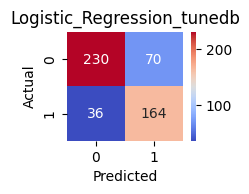

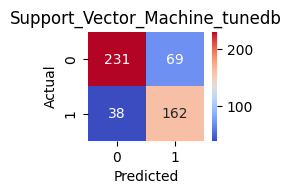

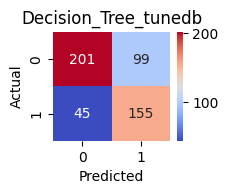

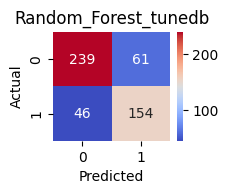

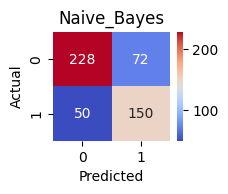

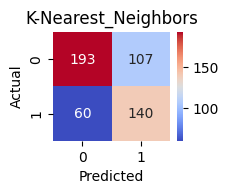

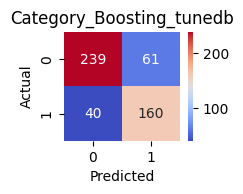

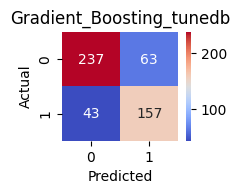

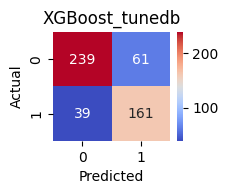

In [770]:

# Creating a loop for visualization
for i, (model_name, confusion_matb) in enumerate(all_confusion_matrices_b.items()):
    plt.subplot(3, 3, i + 1)
    sns.heatmap(confusion_matb, annot=True, fmt='d', cmap='coolwarm')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


/Users/mac/Desktop/Data Analyst Project/Fitness_Classification/venv/lib/python3.13/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


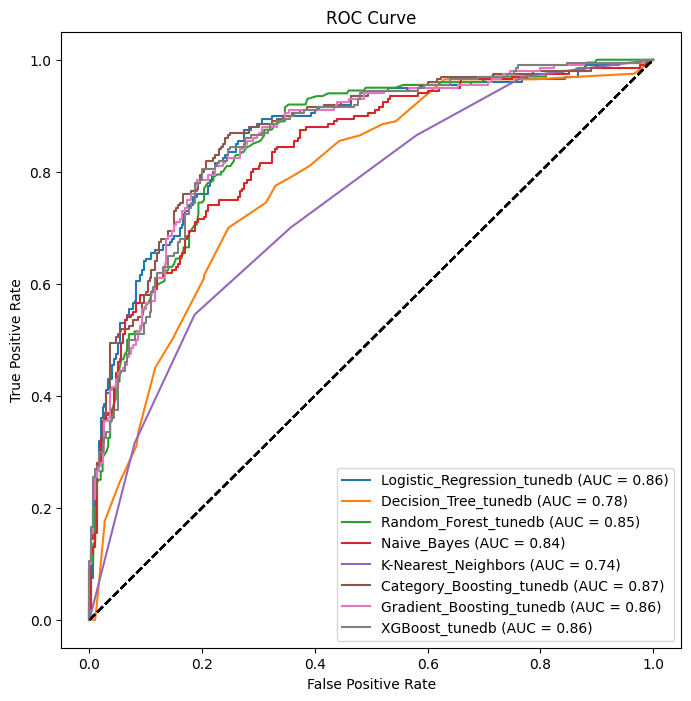

In [771]:
fig, ax = plt.subplots(figsize=(8, 8))
all_confusion_matrix_b = {}

all_roc_data_b = {}

# Iterate over the dictionary items directly
for model_name, pipeline in all_pipelines_b.items():
    
    # Check if the classifier is LinearSVC
    if isinstance(pipeline.named_steps['classifier'], LinearSVC):
        # Fit the pipeline first
        pipeline.fit(X_train, y_train_encode)
        # Wrap LinearSVC with CalibratedClassifierCV
        calibrated_pipeline = CalibratedClassifierCV(pipeline.named_steps['classifier'], method='sigmoid', cv='prefit')
        # Fit the CalibratedClassifierCV instance with training data
        calibrated_pipeline.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train_encode)
        y_score = calibrated_pipeline.predict_proba(pipeline.named_steps['preprocessor'].transform(X_eval))[:, 1]
    else:
        # For classifiers that have predict_proba directly
        y_score = pipeline.predict_proba(X_eval)[:, 1]
    
        fpr, tpr, thresholds = roc_curve(y_eval_encode, y_score)
        roc_auc = auc(fpr, tpr)
    
    
        roc_data_df = pd.DataFrame({'false_positive_rate': fpr, 'true_positive_rate': tpr, 'thresholds': thresholds})
    
        # Store the ROC data in the dictionary
        all_roc_data_b[model_name] = roc_data_df
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_ylabel('True Positive Rate')
        ax.set_xlabel('False Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc="lower right")
plt.show()

### Observations
CatBoost achieved the highest AUC (0.87), indicating superior probability ranking ability, while XGBoost achieved the highest validation accuracy (0.801), making it slightly better at fixed-threshold classification. However, the performance gap is marginal, suggesting both models are strong candidates.

In [772]:

# retrieving the last 65 rows with our XGboosting tuned
subset_roc = all_roc_data_b['XGBoost_tunedb'].tail(65)
subset_roc

,false_positive_rate,true_positive_rate,thresholds
75,0.223333,0.805,0.484578
76,0.223333,0.810,0.480623
77,0.226667,0.810,0.479547
78,0.226667,0.815,0.475035
79,0.230000,0.815,0.470740
...,...,...,...
135,0.846667,0.990,0.067180
136,0.846667,0.995,0.066937
137,0.976667,0.995,0.014986
138,0.976667,1.000,0.014122


In [773]:
print(subset_roc.columns)


Index(['false_positive_rate', 'true_positive_rate', 'thresholds'], dtype='object')


In [774]:
subset_roc['j_stat'] = subset_roc['true_positive_rate'] - subset_roc['false_positive_rate']

# Get row with maximum J
best_row = subset_roc.loc[subset_roc['j_stat'].idxmax()]

best_threshold = best_row['thresholds']
best_tpr = best_row['true_positive_rate']
best_fpr = best_row['false_positive_rate']

print("Best Threshold:", best_threshold)
print("TPR (Recall):", best_tpr)
print("FPR:", best_fpr)


Best Threshold: 0.4413086175918579
TPR (Recall): 0.845
FPR: 0.25


/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_67364/73672174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_roc['j_stat'] = subset_roc['true_positive_rate'] - subset_roc['false_positive_rate']


to improve the true positive rate for the best model, we are going to use threshold value of 0.4413 WITH Maximize 'Youden’s J' Formula.

In [775]:

# pipeline for Gradient boost classifier
XGB_pipeline=all_pipelines_b['XGBoost_tunedb']
XGB_pipeline

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_median_pipeline', ...), ('num_zero_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [776]:

# Picking a threshold
threshold = 0.4413
# Predict the model
y_pred_proba = XGB_pipeline.predict_proba(X_eval)[:, 1]
# getting a quota and convert to an integer datatype
binary_predictions = (y_pred_proba >= threshold).astype(int)
# confusion matrix 
threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

<Axes: >

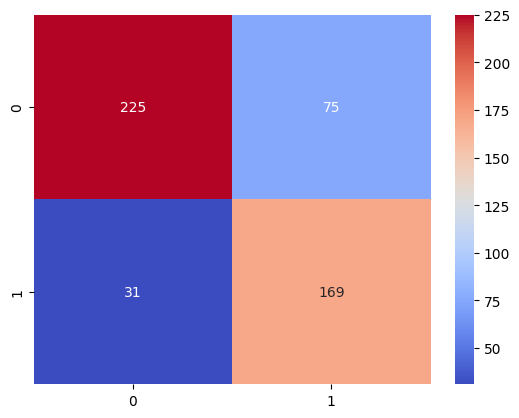

In [778]:

# visualizing heatmap 
sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='coolwarm') 